# 3804ICT Data Mining Assessment

### Import Required Libraries and Data

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv("garments_worker_productivity.csv")

### Data Overview

##### Observations:
    * Categorical attributes (quarter, department, day) are of type object.
    * Categorical attribute team id is type int.
    * WIP attribute has 506 (1197 - 691) missing values.
    * Days attribute category has no "Friday".
    * Department attribute has a data inconsistency with two categories "finishing" and "finishing Department".
    * Department attribute category "sweing" appears to be a misspelling of "sewing".

In [2]:
# Check basic/ data type information
df.info()
null_count = df.isnull().sum().sum()
print("\nNull count for attribute (WIP): ", null_count)

# Convert to category type
df["day"] = df.day.astype("category")
df["team"] = df.team.astype("category")
df["quarter"] = df.quarter.astype("category")
df["department"] = df.department.astype("category")

# Check attribute categories
print("\nDays Categories:\t", np.array(df["day"].cat.categories))
print("Team Categories:\t", np.array(df["team"].cat.categories))
print("Quarter Categories:\t", np.array(df["quarter"].cat.categories))
print("Department Categories:\t", np.array(df["department"].cat.categories))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

##### Categorical Attribute Sub-Categories and Counts:

In [3]:
cat_attributes = ["quarter", "department", "day", "team"]

# Sub-category counts
for attr in cat_attributes:
    print(df.groupby([attr]).size())

quarter
Quarter1    360
Quarter2    335
Quarter3    210
Quarter4    248
Quarter5     44
dtype: int64
department
finishing     249
finishing     257
sweing        691
dtype: int64
day
Monday       199
Saturday     187
Sunday       203
Thursday     199
Tuesday      201
Wednesday    208
dtype: int64
team
1     105
2     109
3      95
4     105
5      93
6      94
7      96
8     109
9     104
10    100
11     88
12     99
dtype: int64


##### Numeric Attribute N, Variance and Five-number Summaries:

In [4]:
# Attribute descriptors
data_description = df.describe()
print(data_description)

# Get attribute median values if different to IQR 50%
numeric_attr_medians = df.median(0, numeric_only=True)
print("\n\tAttribute Medians:")
print(numeric_attr_medians)

       targeted_productivity          smv           wip     over_time  \
count            1197.000000  1197.000000    691.000000   1197.000000   
mean                0.729632    15.062172   1190.465991   4567.460317   
std                 0.097891    10.943219   1837.455001   3348.823563   
min                 0.070000     2.900000      7.000000      0.000000   
25%                 0.700000     3.940000    774.500000   1440.000000   
50%                 0.750000    15.260000   1039.000000   3960.000000   
75%                 0.800000    24.260000   1252.500000   6960.000000   
max                 0.800000    54.560000  23122.000000  25920.000000   

         incentive    idle_time     idle_men  no_of_style_change  \
count  1197.000000  1197.000000  1197.000000         1197.000000   
mean     38.210526     0.730159     0.369256            0.150376   
std     160.182643    12.709757     3.268987            0.427848   
min       0.000000     0.000000     0.000000            0.000000   
25

### Categorical Attribute Visualisation:

##### Countplots, Boxplots and Strip-plots:

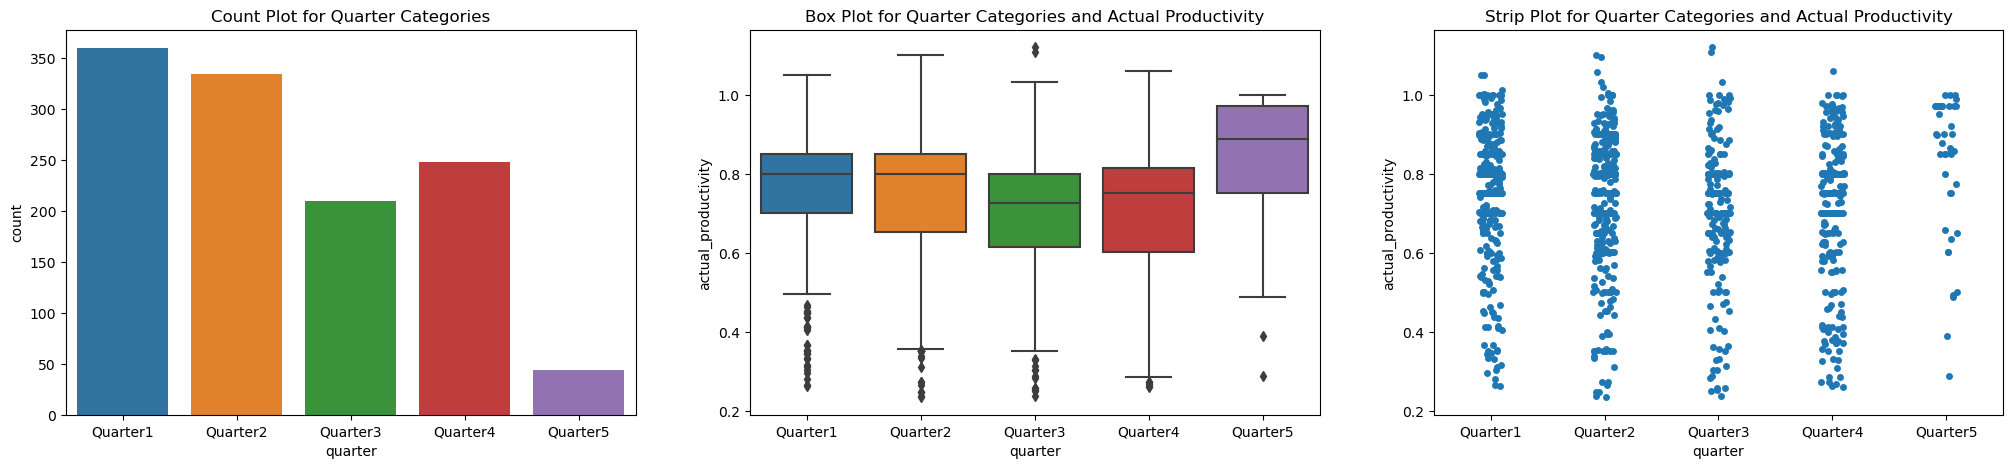

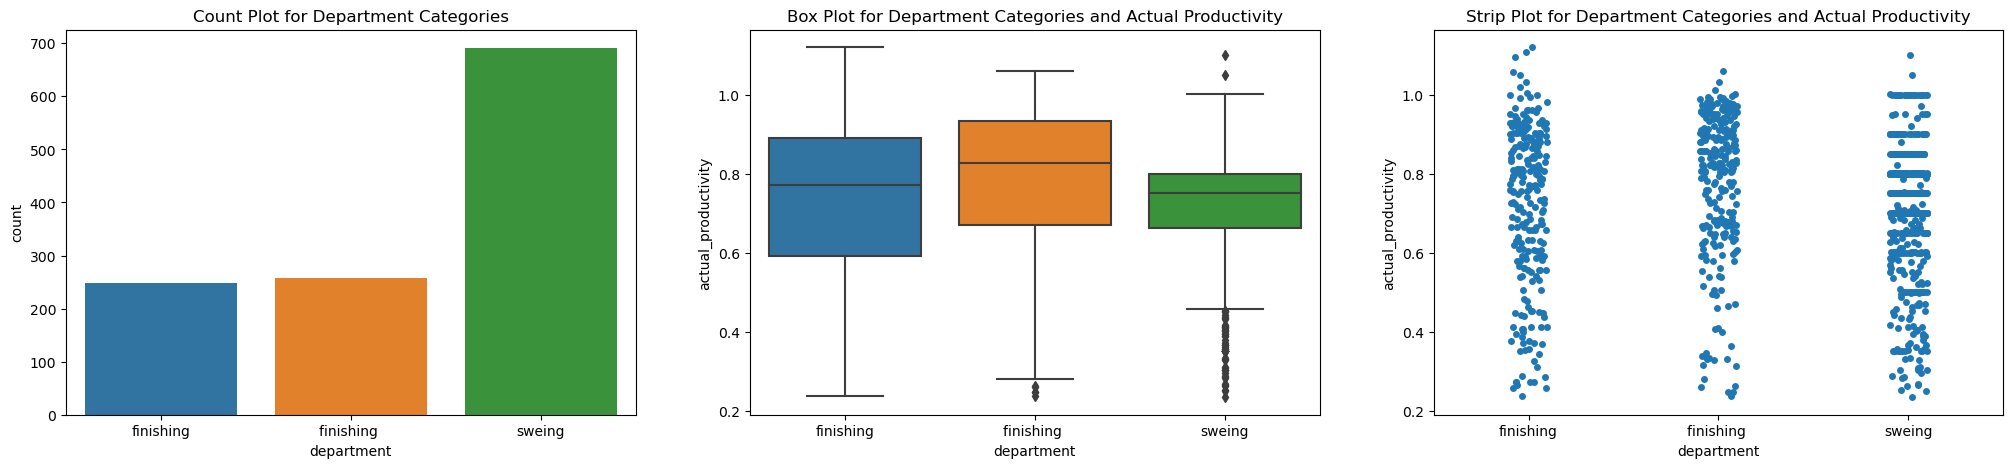

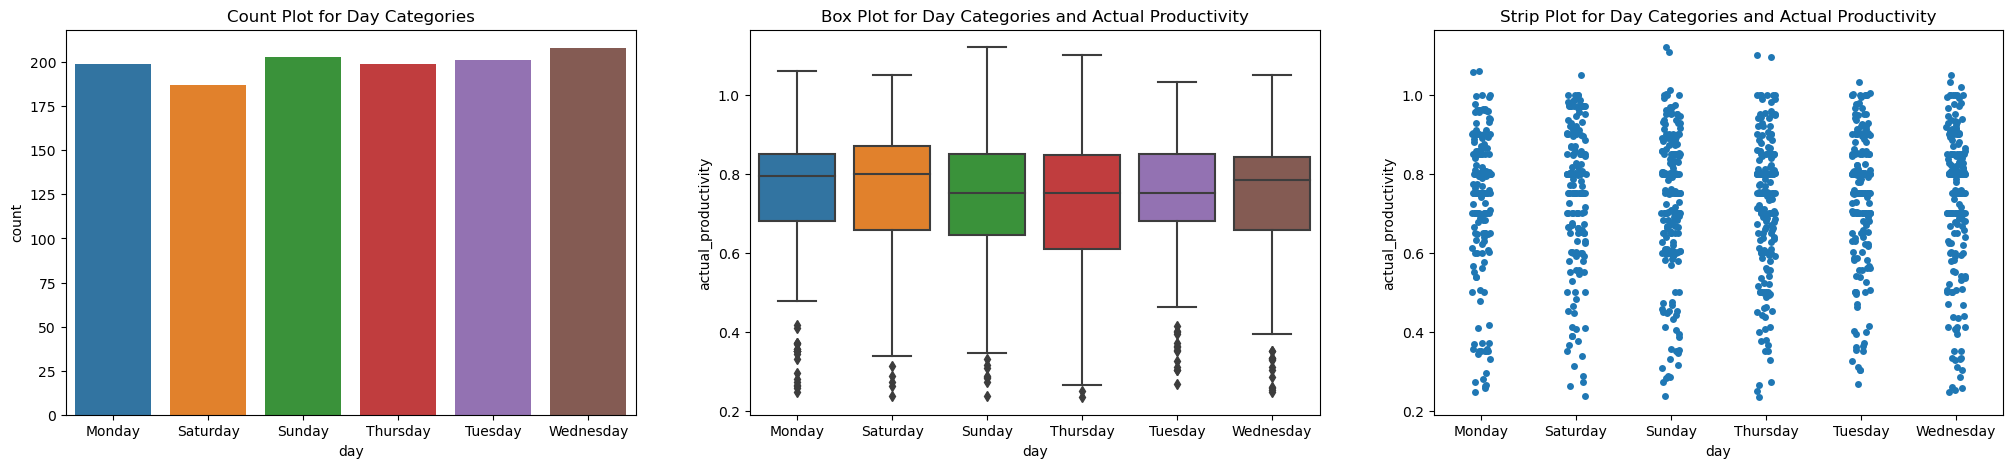

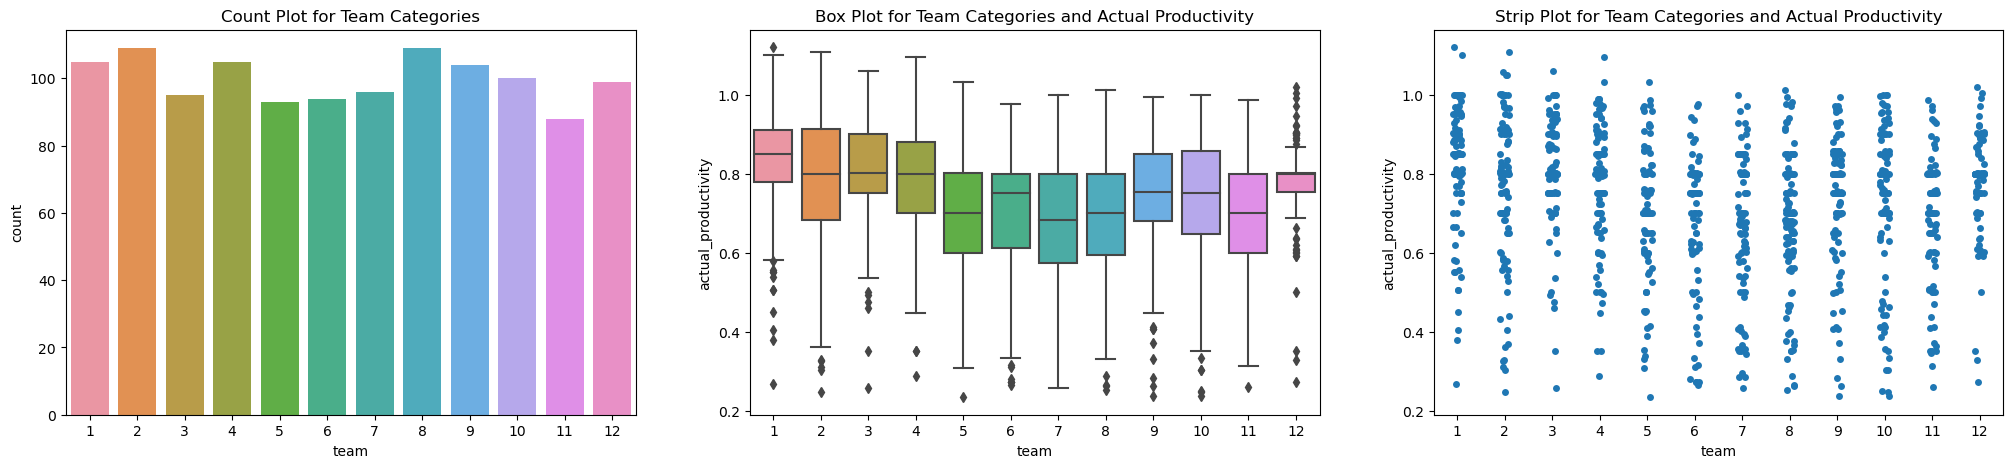

In [5]:
cat_attributes = ["quarter", "department", "day", "team"]

# Visualisations for categorical variables
for attr in cat_attributes:
    fig, axes = plt.subplots(1, 3, figsize=(25, 5))
    sns.countplot(data = df, x = attr, ax=axes[0]).set_title(f'Count Plot for {attr.capitalize()} Categories')
    sns.boxplot(x=attr, y=df["actual_productivity"], data=df, ax=axes[1]).set_title(f'Box Plot for {attr.capitalize()} Categories and Actual Productivity')
    sns.stripplot(x=attr, y=df["actual_productivity"], data=df, ax=axes[2]).set_title(f'Strip Plot for {attr.capitalize()} Categories and Actual Productivity')
    plt.show()

### Numeric Attribute Visualisation:

##### Boxplots and Histograms:

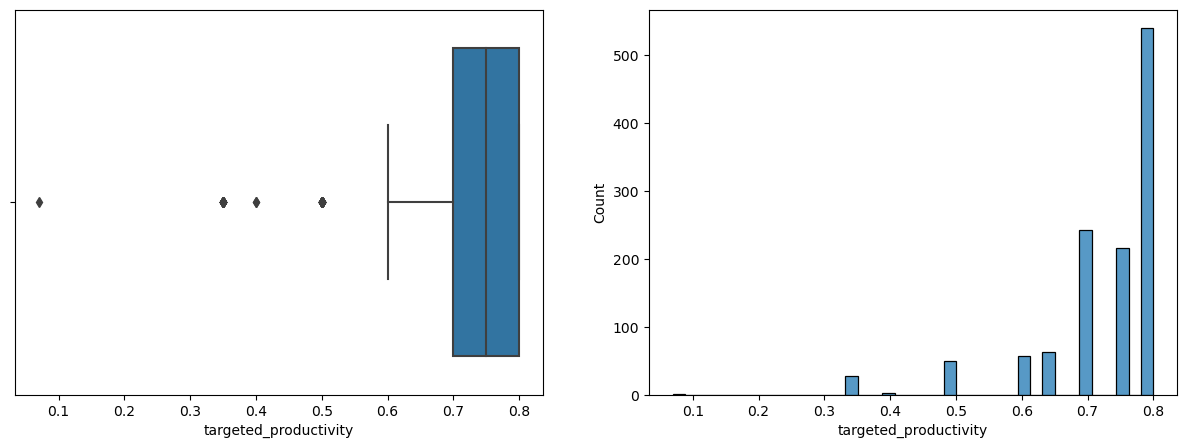

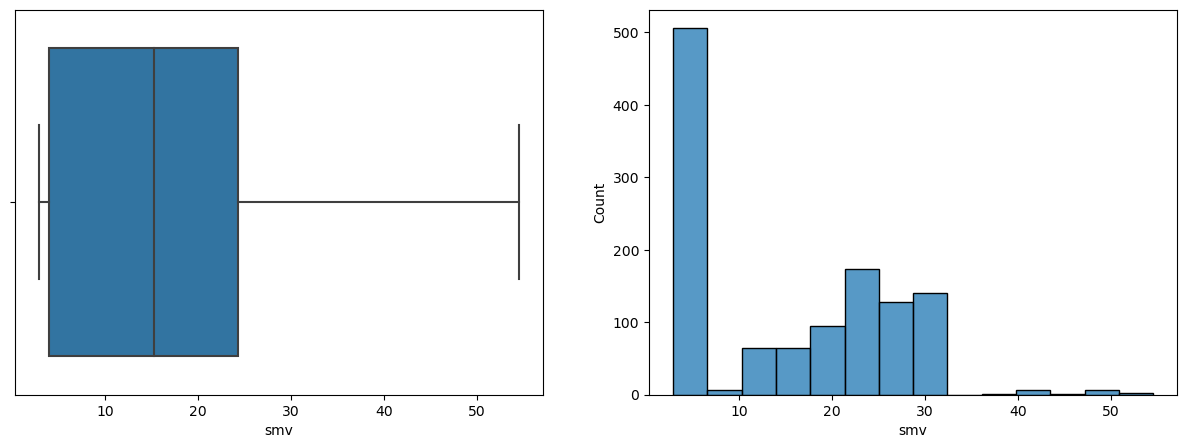

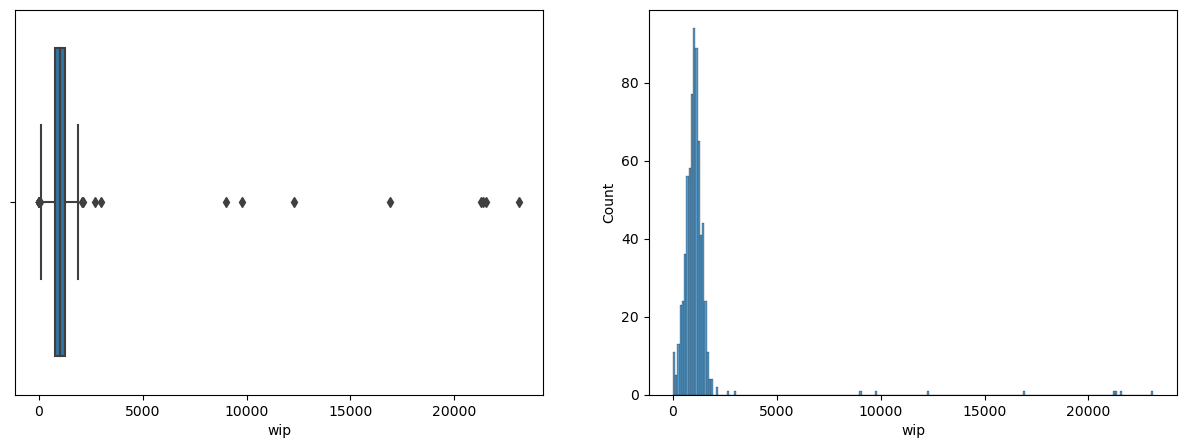

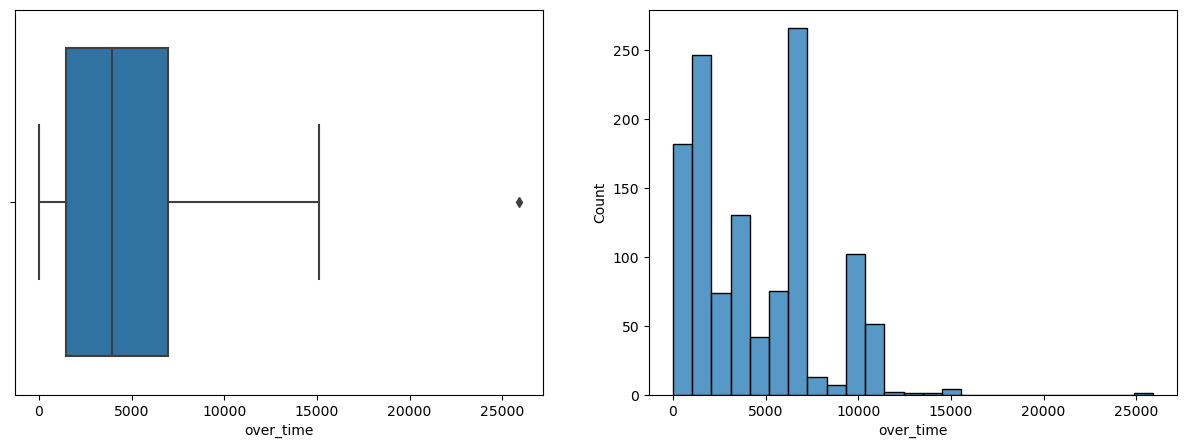

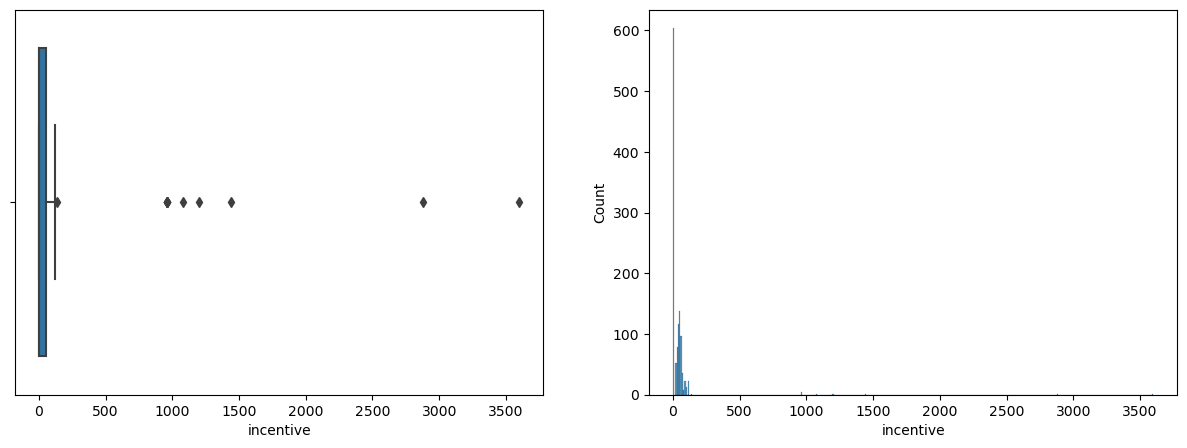

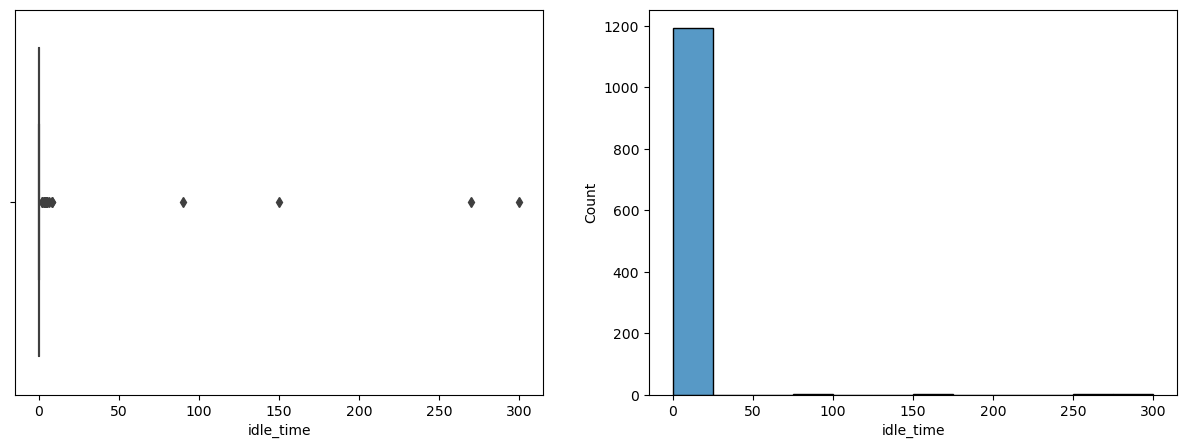

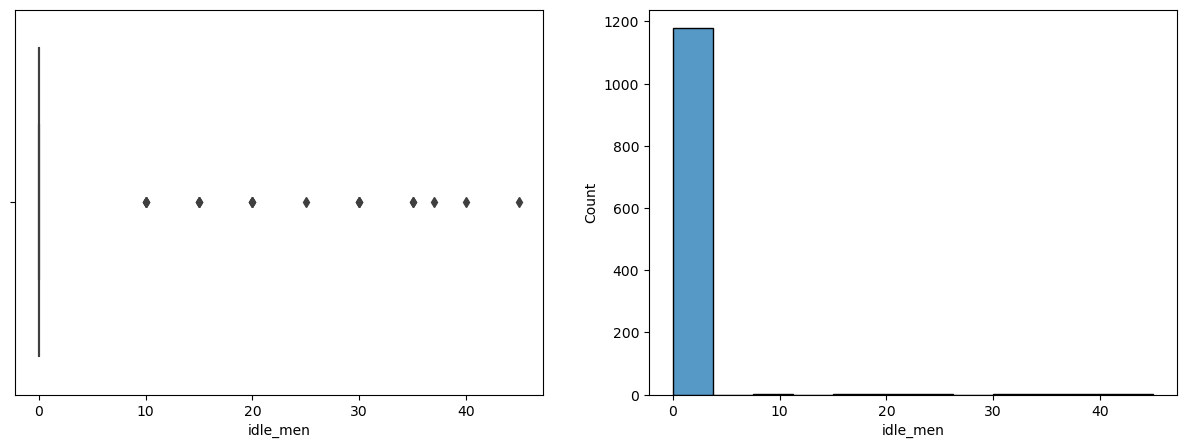

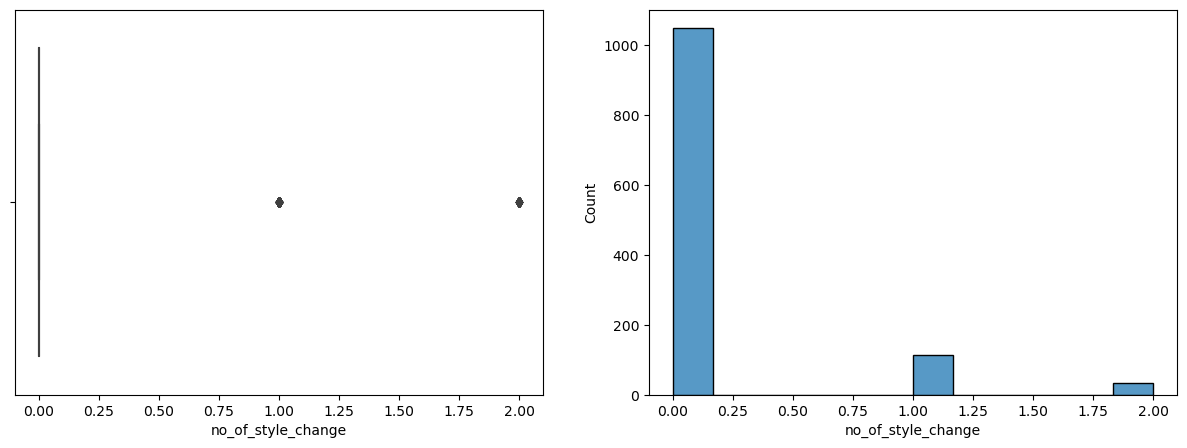

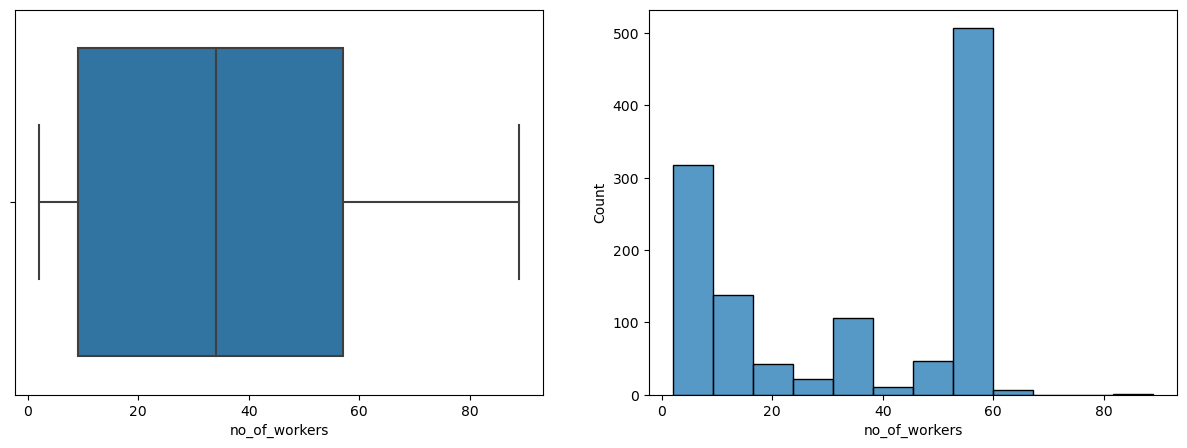

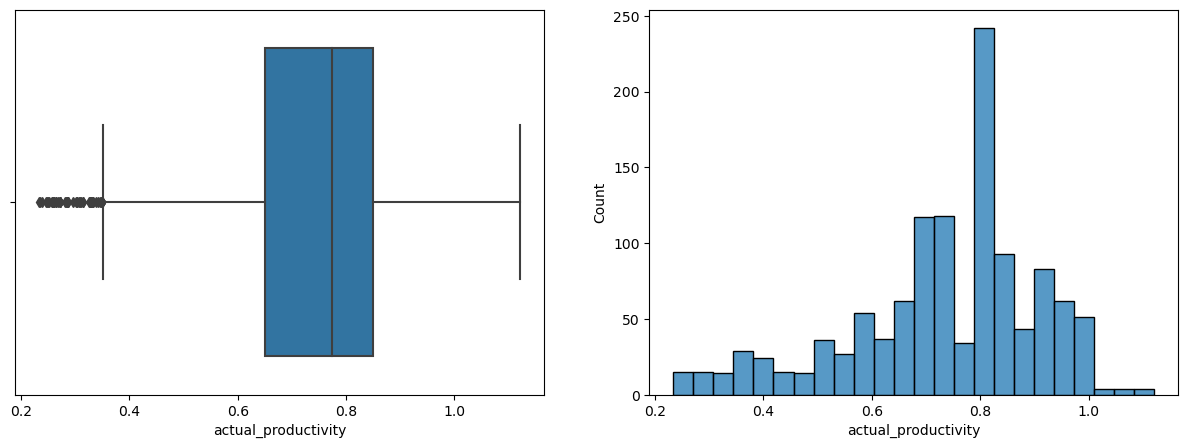

In [6]:
for i, attribute in enumerate(df.columns[5:]):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.boxplot(x=attribute, data=df, ax=axes[0])
    sns.histplot(x=attribute, data=df, ax=axes[1])
    plt.show()

##### Scatterplots:

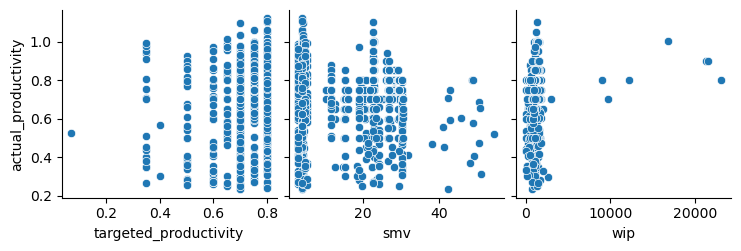

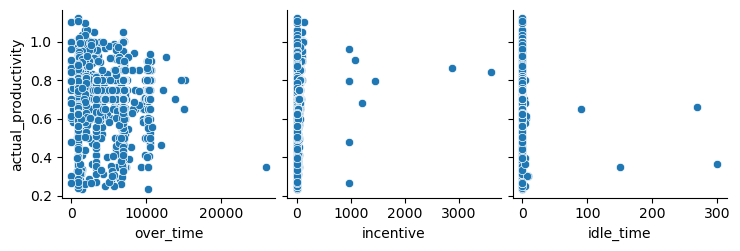

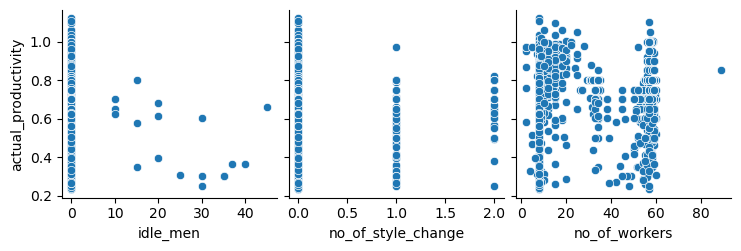

In [7]:
x_vars_list = [['targeted_productivity', 'smv', 'wip'], 
               ['over_time', 'incentive', 'idle_time'], 
               ['idle_men', 'no_of_style_change', 'no_of_workers']]

for x_vars in x_vars_list:
    sns.pairplot(df, x_vars=x_vars, y_vars=['actual_productivity'])
    plt.show()

### Data-Preprocessing

##### Cleaning (Missing Data):
    * WIP attribute dropped from data to handle missing values.

In [8]:
# Remove WIP attribute
df.drop("wip", axis=1, inplace=True)

##### Cleaning (Resolve Inconsistencies and Smooth Noisy Data):
    * SMV attribute dropped due to high correlation with number of men.
    * Quarter dropped due to imbalanced distribution between categories and not being explored in current investigation.
    * Department attribute "finishing" and "finishing " categories adjusted to be the same.
    * Department attribute "sweing" corrected to "sewing".
    * Incentive attribute can be close to evenly split between 0 incentive and > 0 incentive.

In [9]:
# Remove attributes
df.drop("smv", axis=1, inplace=True)
df.drop("quarter", axis=1, inplace=True)
df_copy = pd.DataFrame()
df_copy["incentive"] = df["incentive"]

In [10]:
# Confirm fairly even distribution between No inventive and Yes incentive
zero = df.incentive[df.incentive == 0].count()
nonzero = df.incentive[df.incentive > 0].count()
print(f'Incentive Zero and Non-Zero values: {zero}, {nonzero}')

# Locate and apply attribute category correction
df["department"] = df.department.astype("object")
df["department"].mask(df["department"] == "finishing ", "finishing", inplace=True)
df["department"].mask(df["department"] == "sweing", "sewing", inplace=True)
df["department"] = df.department.astype("category")

# Reassign incentive values to (No) incentive and (Yes) incentive
df["incentive"].mask(df["incentive"] > 0, "yes", inplace=True)
df["incentive"].mask(df["incentive"] == 0, "no", inplace=True)
df["incentive"] = df["incentive"].astype("category")

# Reassign Number of style changes to (No) style change and (Yes) style change
df["no_of_style_change"].mask(df["no_of_style_change"] > 0, "yes", inplace=True)
df["no_of_style_change"].mask(df["no_of_style_change"] == 0, "no", inplace=True)
df["no_of_style_change"] = df["no_of_style_change"].astype("category")

# Check new distribution of style changes
style = df.no_of_style_change[df.no_of_style_change == "yes"].count()
no_style = df.no_of_style_change[df.no_of_style_change == "no"].count()
print(f'No. Style Changes No style and style changes: {no_style}, {style}')

# Check attribute categories
print("\nIncentive Categories Adjusted:\t\t", np.array(df["incentive"].cat.categories))
print("Department Categories Adjusted:\t\t", np.array(df["department"].cat.categories))
print("No. Style Changes Categories Adjusted:\t", np.array(df["no_of_style_change"].cat.categories))

Incentive Zero and Non-Zero values: 604, 593
No. Style Changes No style and style changes: 1050, 147

Incentive Categories Adjusted:		 ['no' 'yes']
Department Categories Adjusted:		 ['finishing' 'sewing']
No. Style Changes Categories Adjusted:	 ['no' 'yes']


##### Data Transformation:
    * Day attribute is encoded with cosine and sine conversions to account for its cyclical nature.
    * One-Hot Encoded Attributes (Team, Incentive, Department, No_of_style_changes)

In [11]:
# Calculate consine and sine for day attribute
df["day"] = df["day"].cat.rename_categories({"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Saturday": 6, "Sunday": 7})
df["day"] = df.day.astype("float64")
df["day_sin"] = np.sin(df["day"] * (2 * np.pi / 7))
df["day_cos"] = np.cos(df["day"] * (2 * np.pi / 7))

# Add attribute dummy (one-hot encoding) to dataframe
attrs_to_dummy = ["department", "no_of_style_change", "incentive"] # Removed "team"
for attr in attrs_to_dummy:
    df = pd.get_dummies(data=df, prefix="dummy_" + attr, columns=[attr])

##### Data Normalisation:
    * Normalised attributes due to different ranges (no. workers, targeted productivity, overtime, idle time, idle men).

In [12]:
attrs_to_normalise = ["no_of_workers", "targeted_productivity", "over_time", "idle_time", "idle_men"]

# Normalise attributes and add to dataframe
for attr in attrs_to_normalise:
    df["norm_" + attr] = (df[attr] - df[attr].mean()) / df[attr].std()

##### Visualise Pre-Processed Data:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   date                          1197 non-null   object  
 1   day                           1197 non-null   float64 
 2   team                          1197 non-null   category
 3   targeted_productivity         1197 non-null   float64 
 4   over_time                     1197 non-null   int64   
 5   idle_time                     1197 non-null   float64 
 6   idle_men                      1197 non-null   int64   
 7   no_of_workers                 1197 non-null   float64 
 8   actual_productivity           1197 non-null   float64 
 9   day_sin                       1197 non-null   float64 
 10  day_cos                       1197 non-null   float64 
 11  dummy_department_finishing    1197 non-null   bool    
 12  dummy_department_sewing       1197 non-null   bo

In [14]:
df.head()

### Data Investigation

##### Load Pre-processed Data:

In [15]:
from sklearn.model_selection import train_test_split
df_pp = pd.read_csv("3804ICT_Preprocessed_Data.csv")

# Adjust actual_productivity values above 100% to be median
act_prod_median = round(df["actual_productivity"].median(), 2)
df_pp["actual_productivity"].mask(df_pp['actual_productivity'] > 1.0, act_prod_median, inplace=True)
df_pp["dummy_incentive_yes"] = df["dummy_incentive_yes"].astype("int")
df_pp["dummy_incentive_no"] = df["dummy_incentive_no"].astype("int")

##### Sklean Implementation (Linear Regression):

INCENTIVE
Coefficient:	 0.364
MSE:		 0.008
R2:		 0.389
P:		 0.0


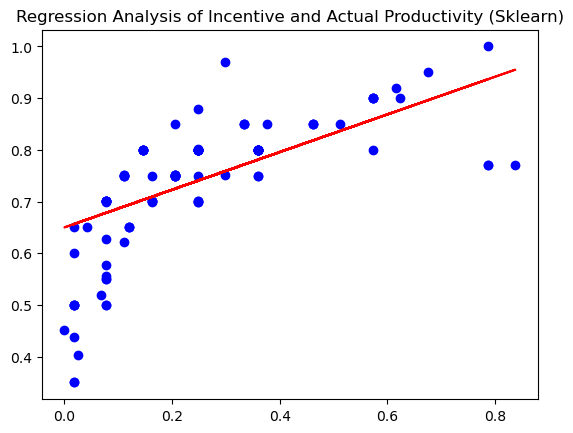

TARGETED PRODUCTIVITY
Coefficient:	 0.956
MSE:		 0.004
R2:		 0.65
P:		 0.0


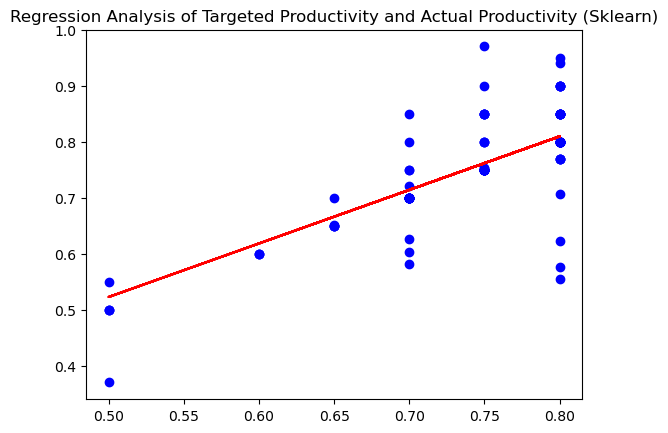

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

df_pp["incentive"] = df_copy["incentive"]
df_pp.incentive = df_pp.incentive[df_pp["incentive"] > 1]
df_pp.incentive = df_pp.incentive[df_pp["incentive"] < 200]
df_pp.dropna(inplace=True)
df_pp["norm_incentive"] = (df_pp.incentive - df_pp.incentive.min()) / (df_pp.incentive.max() - df_pp.incentive.min())

# Select Dependend and Independent variables
x_variables = ["norm_incentive", "targeted_productivity"]
x_variable_headers = ["Incentive", "Targeted Productivity"]

# Loop through x variables for linear regression analysis
for i in range(len(x_variables)):
    
    x = np.array(df_pp[x_variables[i]]).reshape(-1, 1)
    y = np.array(df_pp['actual_productivity']).reshape(-1, 1)

    # Split data for training and testing model
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    
    # Fit model test data
    sk_regression = LinearRegression()
    sk_regression.fit(x_train, y_train)                                        # Order (x, y) 
    sk_predict = sk_regression.predict(x_test)
    
    sm_x_train, sm_x_test = sm.add_constant(x_train), sm.add_constant(x_test)  # Manually add required constant
    sm_regression = sm.OLS(y_train, sm_x_train).fit()                          # Order (y, x)
    sm_predict = sm_regression.predict(sm_x_test)
    
    # Display metric coefficients and plot model
    print(str(x_variable_headers[i]).upper())
    print("Coefficient:\t", round(sk_regression.coef_[0][0], 3))
    print("MSE:\t\t", round(mean_squared_error(y_test, sk_predict), 3))        # Mean Square Error
    print("R2:\t\t", round(sk_regression.score(x_train, y_train), 3))          # Coefficient of Determination
    print("P:\t\t", round(sm_regression.summary2().tables[1]['P>|t|'][1], 3))  # (constant P, x1_P)

    plt.scatter(x_test, y_test, color ='blue')
    plt.plot(x_test, sk_predict, color ='red')
    plt.title(f'Regression Analysis of {x_variable_headers[i]} and Actual Productivity (Sklearn)')
    plt.show()

##### Own Implementation (Linear Regression):

In [54]:
class Regression():
    
    def __init__(self):
        """Initialise regression variables."""

        self.X, self.Y, self.X_test = None, None, None
        self.weight, self.bias = 0.0, 0.0
        self.epochs = 10000
        self.learning_rate = 0.01
    
    
    def fit(self, X, Y):
        """Main regression function to loop set number of epochs and train model."""

        self.X, self.Y = X, Y

        for i in range(self.epochs):
            self.gradient_descent()


    def gradient_descent(self):
        """Function used to calculate minimisation of regression loss function. 1/N * Sum(y - y_predicted)^2"""

        weight_gradient, bias_gradient = 0.0, 0.0
        n = len(self.X)

        # Iterate through data points
        for p in range(n):
            x = float(self.X[p])
            y = float(self.Y[p])
            y_predict = self.weight * x + self.bias
            
            # Calculate gradient 
            weight_gradient += -(2 / n) * x * (y - y_predict)
            bias_gradient += -(2 / n) * (y - y_predict)

        # Apply adjustment: Current val - val gradient * learning rate
        self.weight = self.weight - (weight_gradient * self.learning_rate)
        self.bias = self.bias - (bias_gradient * self.learning_rate)



    def predict(self, x_test):
        """Function to predict y-axis values based on modelled weight and bias values."""

        predicted = []
        self.X_test = x_test

        for x in x_test:
            y = self.weight * x + self.bias
            predicted.append(float(y))

        return predicted
        
    
    def MSE_metric(self, x_test, y_test):
        """Function to calculate Mean Squared Error."""
        
        mse = 0
        n = len(x_test)
        
        for p in range(n):
            y_predict = self.weight * float(x_test[p]) + self.bias
            mse += (float(y_test[p]) - y_predict)**2
            
        return mse / n
            
    
    
    def R2_metric(self, x_test, y_test):
        """Function to calculate Coefficient of Determination."""

        ssr = 0                            # Sum Squared Regression (SSR)
        sst = 0                            # Total Sum of Squares (SST)
        y_bar = sum(y_test) / len(y_test)  # Y-axis mean

        for p in range(len(x_test)):

            # For SSR
            y_predict = self.weight * float(x_test[p]) + self.bias

            residual_1 = float(y_test[p]) - y_predict
            ssr += residual_1**2

            # For SST
            residual_2 = float(y_test[p]) - y_bar
            sst += residual_2**2

        # Return R2 = 1 - (SSR / SST) 
        return float(1 - (ssr / sst))

R2:  0.444 
MSE:  0.006


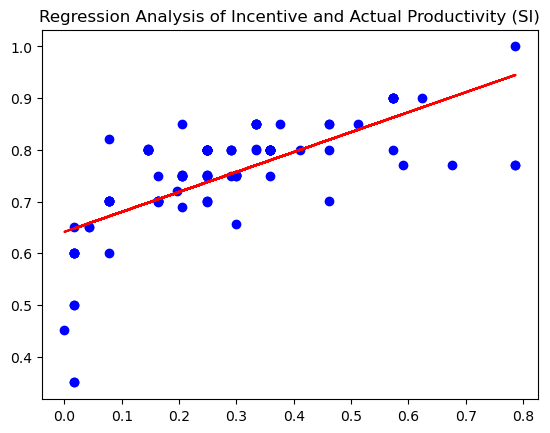

R2:  0.619 
MSE:  0.003


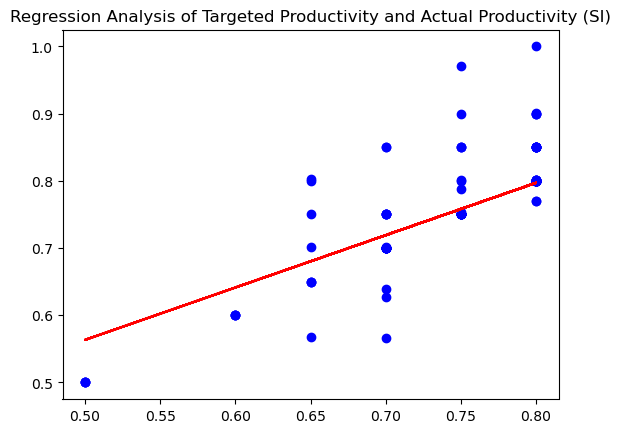

In [60]:
# Declare dependent and independent variables
x_variables = ["norm_incentive", "targeted_productivity"]
x_variable_headers = ["Incentive", "Targeted Productivity"]

for i in range(len(x_variables)):
    x = np.array(df_pp[x_variables[i]]).reshape(-1, 1)
    y = np.array(df_pp["actual_productivity"]).reshape(-1, 1)

    # Split data for training and testing model
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

    # Build and test model
    reg = Regression()
    reg.fit(x_train, y_train)
    prediction = reg.predict(x_test)

    # Display model results
    print("R2: ", round(reg.R2_metric(x_test, y_test), 3), "\nMSE: ", round(reg.MSE_metric(x_test, y_test), 3))
    plt.scatter(x_test, y_test, color ='blue')
    plt.plot(x_test, prediction, color ='red')
    plt.title(f'Regression Analysis of {x_variable_headers[i]} and Actual Productivity (SI)')
    plt.show()

##### Sklean Implementation (K-means):

In [ ]:
from sklearn.cluster import KMeans

df_pp["team"] = df["team"]
df_pp["incentive"] = df_copy["incentive"]
# Split data for training and testing model

kx_variables = ["norm_over_time", "incentive", "targeted_productivity", "no_of_workers"]
for var in kx_variables:
    x_train, x_test, y_train, y_test = train_test_split(df_pp[["targeted_productivity", var]], df_pp["team"], test_size = 0.2)

    sk_kmeans = KMeans(n_clusters = 5, random_state = 0, n_init='auto')
    sk_kmeans.fit(x_train)
    sns.scatterplot(data = x_train, x = "targeted_productivity", y = var, hue = sk_kmeans.labels_)
    plt.show()